In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_train = pd.read_csv("train.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_train = df_train.set_index("PassengerId")
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###### Variable Identification

In [4]:
## we have to predict whether passenger survived of not...so our target/label (output) variable will be "SURVIVED"
## and remaining columns will be Predictors(input variables)

x = targets = labels = output_var = df_train["Survived"]
y = predictors = input_var = df_train.loc[:,df_train.columns != "Survived"]

In [5]:
x.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [6]:
y.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###### Identify the data type of the variables.

In [7]:
df_train.describe(include = ['float64','int64'])

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
## analyse the target variable "survived"
## calculate the percentage of who survived and not survived



df_train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
per_sur_nonsur = (df_train["Survived"].value_counts()/df_train.shape[0]*100).round(2)
per_sur_nonsur

0    61.62
1    38.38
Name: Survived, dtype: float64

# A count plot can be thought of as a histogram across a categorical, instead of quantitative, variables



# Univariate Analysis

<AxesSubplot:xlabel='Survived', ylabel='count'>

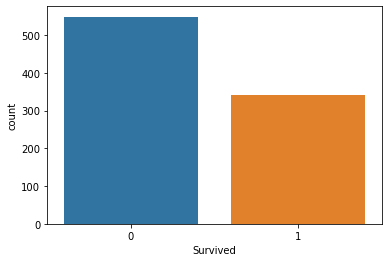

In [10]:
## let plot a graph who survived and not survived as the column data

sns.countplot(data=df_train,x="Survived")

<AxesSubplot:xlabel='Pclass', ylabel='count'>

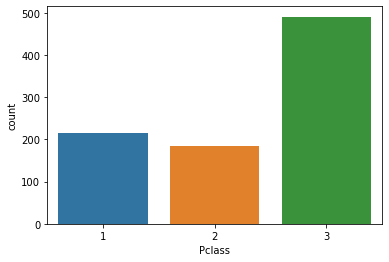

In [11]:
sns.countplot(data=df_train,x="Pclass")


In [12]:
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

<AxesSubplot:xlabel='Sex', ylabel='count'>

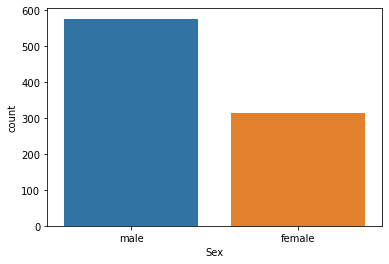

In [13]:
sns.countplot(data=df_train,x="Sex")

<AxesSubplot:xlabel='SibSp', ylabel='count'>

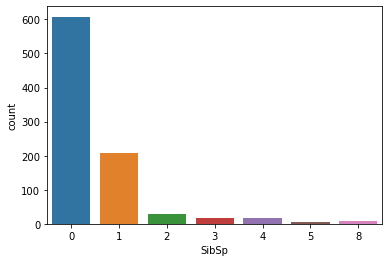

In [14]:
sns.countplot(data=df_train,x="SibSp")

<AxesSubplot:xlabel='Parch', ylabel='count'>

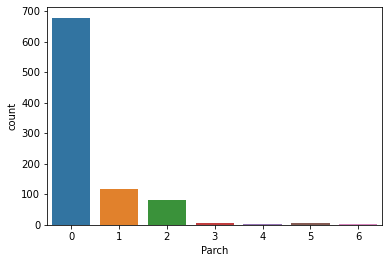

In [15]:
sns.countplot(data=df_train,x="Parch")

<AxesSubplot:xlabel='Embarked', ylabel='count'>

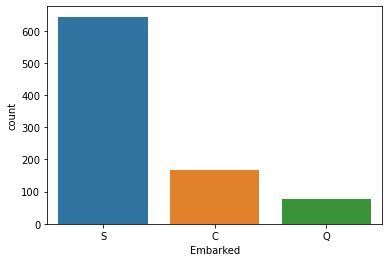

In [16]:
sns.countplot(data=df_train,x="Embarked")

<AxesSubplot:xlabel='Age', ylabel='Density'>

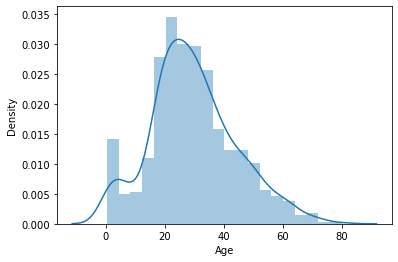

In [17]:
sns.distplot(df_train['Age'].dropna())

<AxesSubplot:xlabel='Fare', ylabel='Density'>

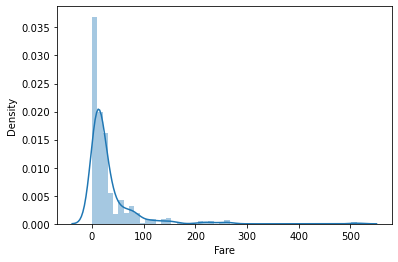

In [18]:
sns.distplot(df_train['Fare'].dropna())

# Bivariate Analysis
1) we perform bivariate analysis with 2 variables for any combination of categorical and continous variables.
2) The combination can be : categorical&categorical, Categorical&Continous and Continous&continous
3) Different methods are used to tackle these combinations durinng analysis    

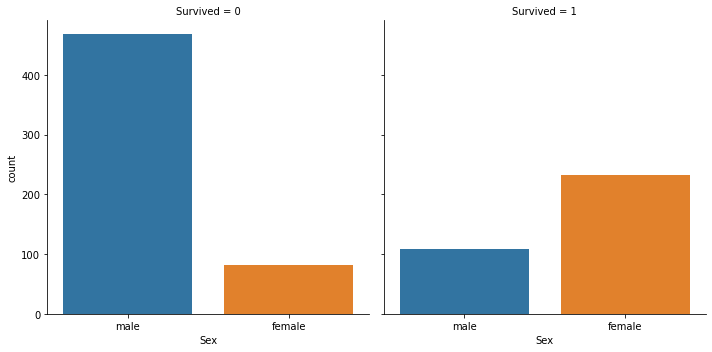

In [20]:
# lets eloborate survived data with sex and we will use catplot or countplot

sns.catplot(x="Sex",col="Survived",data=df_train,kind="count")

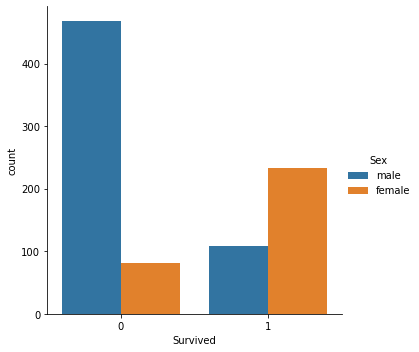

In [21]:
sns.catplot(x="Survived",hue="Sex",data=df_train,kind="count")

<AxesSubplot:xlabel='Survived', ylabel='count'>

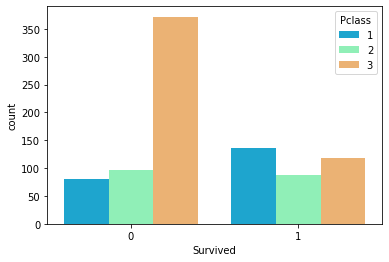

In [26]:
# lets eloborate survived data with Pclass and we will use catplot or countplot

sns.countplot(data=df_train,x="Survived",hue="Pclass",palette="rainbow")

<AxesSubplot:xlabel='Pclass', ylabel='count'>

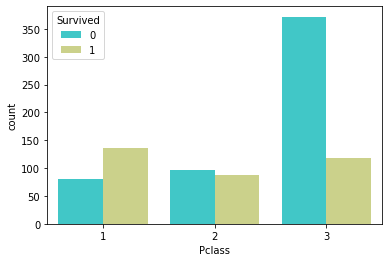

In [28]:

sns.countplot(data=df_train,x="Pclass",hue="Survived",palette="rainbow")

<AxesSubplot:xlabel='SibSp', ylabel='count'>

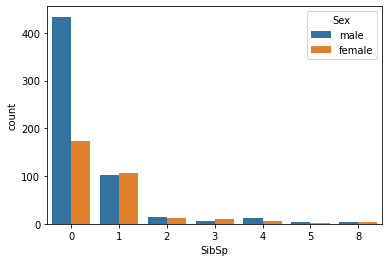

In [37]:
# Display sibling with sex data

sns.countplot(data=df_train,x="SibSp",hue="Sex")

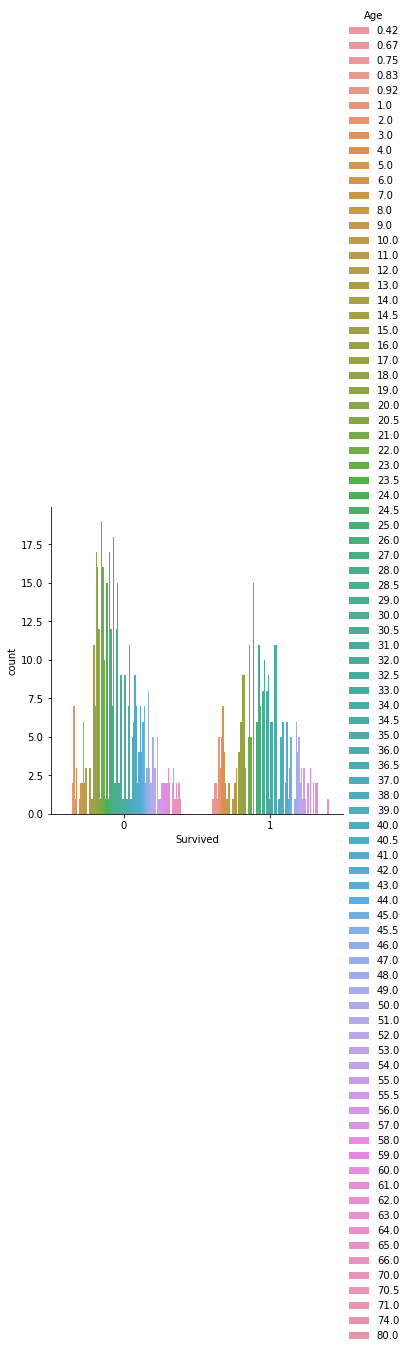

In [34]:
# display survived with age data

sns.catplot(data=df_train,x="Survived",hue="Age",kind="count")

<AxesSubplot:title={'center':'Age'}, xlabel='Survived'>

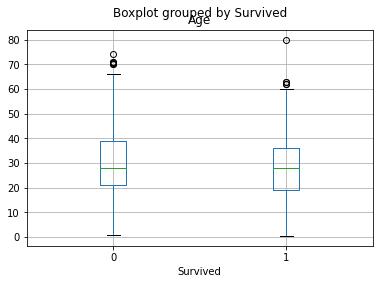

In [41]:
df_train.boxplot(column='Age',by="Survived")

<AxesSubplot:title={'center':'Fare'}, xlabel='Survived'>

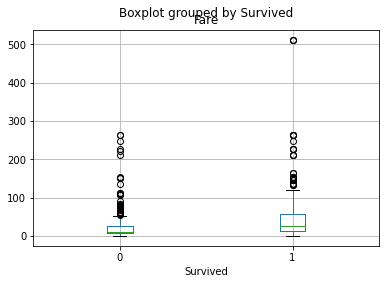

In [43]:
# display survived with fare data

df_train.boxplot(column='Fare',by='Survived')

###### Bivariate Analysis of Continous Variables v/s Continous Variables

<AxesSubplot:xlabel='Age', ylabel='Fare'>

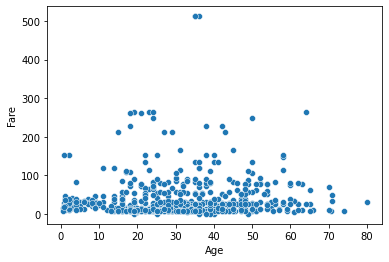

In [44]:
# display Fare with age data using scatter plot

sns.scatterplot(x=df_train["Age"],y=df_train["Fare"])

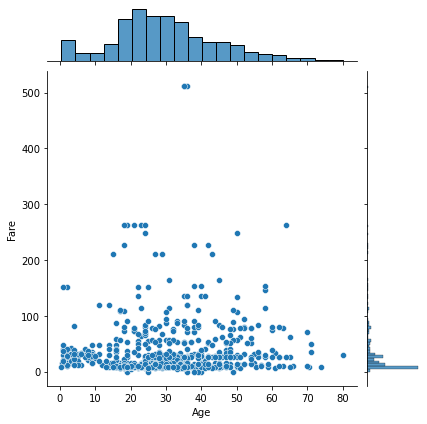

In [46]:
# display Fare with age data using joint plot

sns.jointplot(x="Age",y="Fare",data=df_train)

# MULTIVARIATE ANALYSIS

1) We perform multivariate analysis with more than 2 variables for any combination of categorical and continous variables.
2) The combination can be : Categorical&categorical ; Continous&cnotinous ; Categorical&Continous.
3) Different methods are used to tackle these combinations during analysis process.    

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

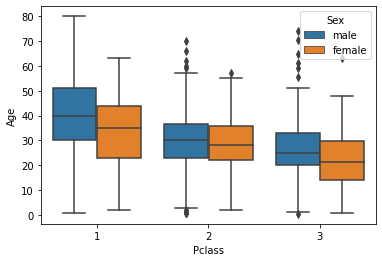

In [48]:
sns.boxplot(x='Pclass',y='Age',hue='Sex',data=df_train)

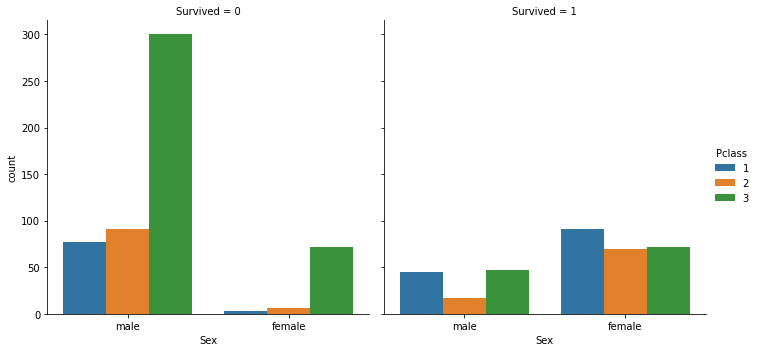

In [50]:
#Display survived data with Plcass and sex using catplot

sns.catplot(data=df_train,col="Survived",x="Sex",hue="Pclass",kind="count")

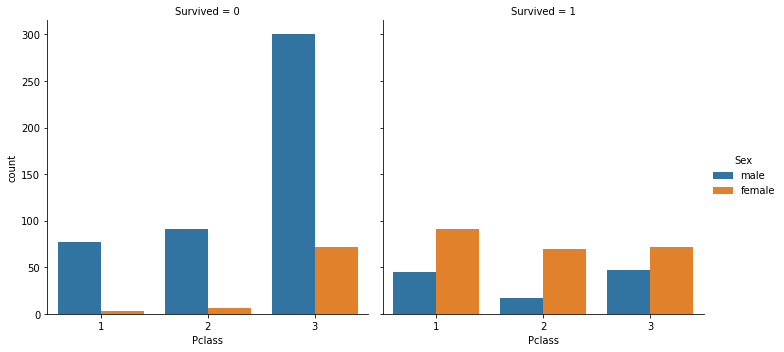

In [51]:
sns.catplot(data=df_train,col="Survived",x="Pclass",hue="Sex",kind="count")

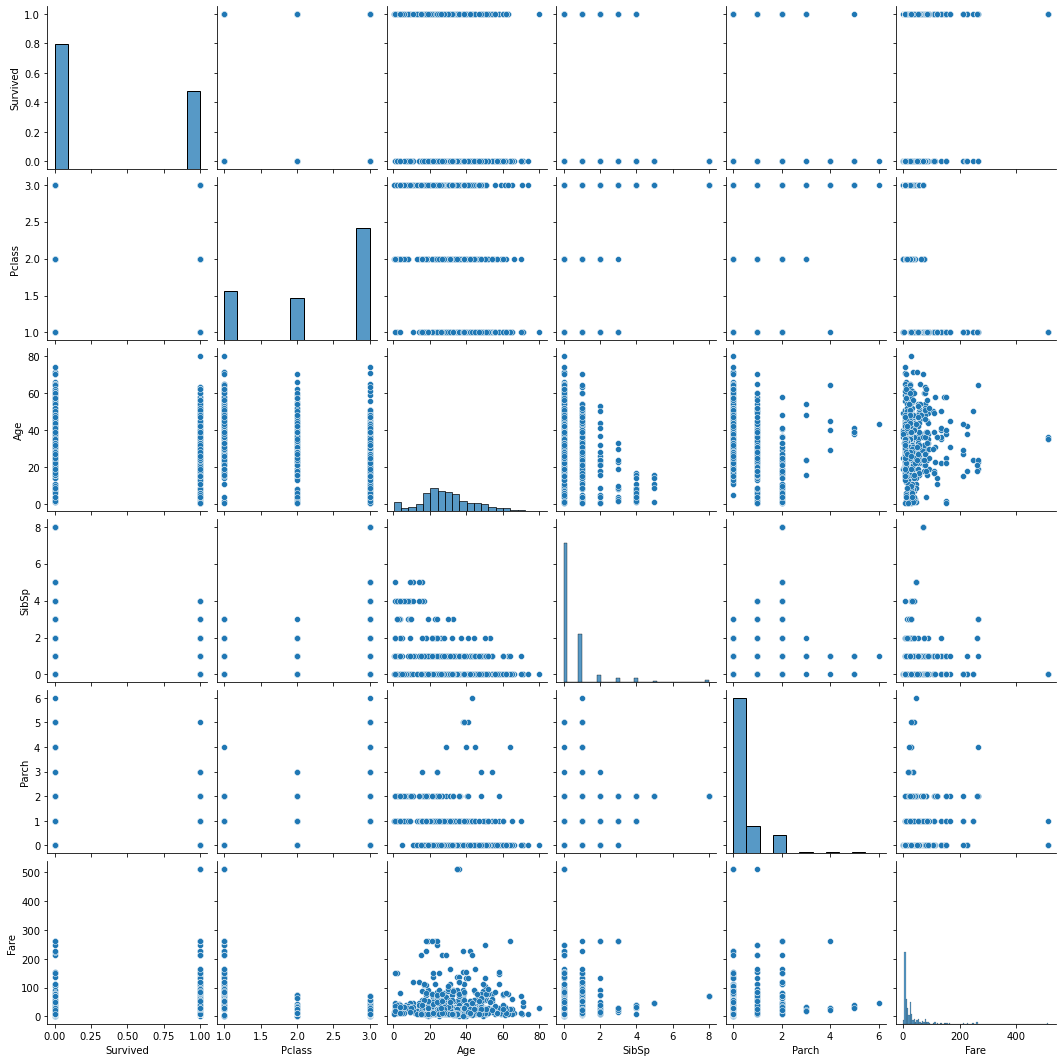

In [53]:
sns.pairplot(df_train)

# DATA CLEANING

### 1) Handling Duplicate Data

In [56]:
df_train.duplicated()

PassengerId
1      False
2      False
3      False
4      False
5      False
       ...  
887    False
888    False
889    False
890    False
891    False
Length: 891, dtype: bool

### 2) Handling Missing Values (Categorical and Numerical Data)

In [57]:
df_train.isnull()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
887,False,False,False,False,False,False,False,False,False,True,False
888,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,True,False,False,False,False,True,False


<AxesSubplot:ylabel='PassengerId'>

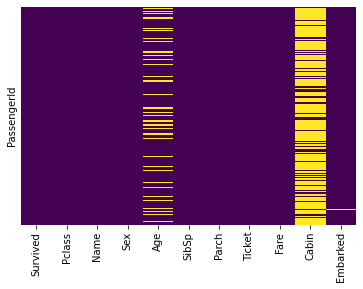

In [59]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap="viridis")

<AxesSubplot:ylabel='PassengerId'>

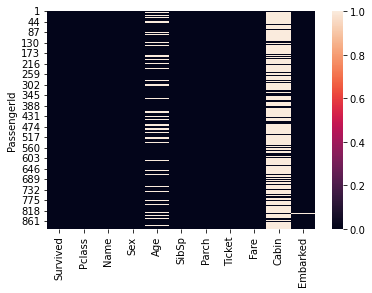

In [60]:
sns.heatmap(df_train.isnull())

In [61]:
percent_missing = df_train.isnull().sum()*100/len(df_train)

In [62]:
percent_missing

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

#### one way to handle missing values is to drop it

In [63]:
df_train=df_train.dropna(subset=["Age","Embarked"],axis=0).copy()

In [64]:
df_train.shape

(712, 11)

In [66]:
percent_missing = df_train.isnull().sum()*100/len(df_train)
percent_missing

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age          0.000000
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       74.297753
Embarked     0.000000
dtype: float64

In [69]:
df_train.drop("Cabin",axis=1,inplace=True)

In [70]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### 3) Handling Outliers

In [72]:
df_train["Age"].describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age'>

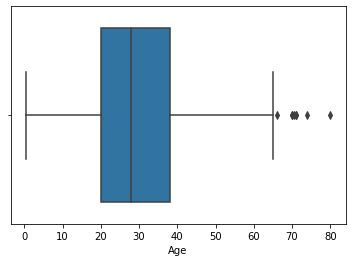

In [75]:
sns.boxplot(x="Age",data=df_train)


<AxesSubplot:xlabel='Fare'>

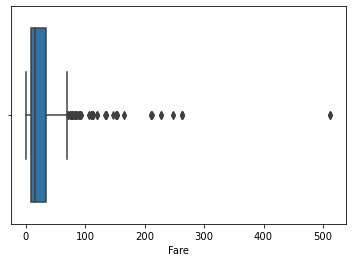

In [74]:
sns.boxplot(x="Fare",data=df_train)